In [50]:
import RMS_utils
train_dir, validation_dir, class_weight = RMS_utils.prep_dir("RMS myogenin/")

No. ARMS Train: 91
No. ERMS Train: 256
No. ARMS Validation: 33
No. ERMS Validation: 114


In [51]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers, models, activations
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.35))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 4, 4, 1536)        54336736  
_________________________________________________________________
dense_9 (Dense)              (None, 4, 4, 1024)        1573888   
_________________________________________________________________
flatten_3 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              16778240  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 1025      
Total params: 72,689,889
Trainable params: 72,629,345
Non-trainable params: 60,544
_____________________________________

In [52]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model.compile(optimizer = Adam(lr=0.00007), 
              loss = 'binary_crossentropy', 
              metrics = ['AUC'])

train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   rotation_range = 360,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.0,
                                   shear_range = 0.0,
                                   zoom_range = 0.0,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode='wrap')

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator, validation_generator = RMS_utils.prep_datagen(train_dir, validation_dir, train_datagen, 10, 200)

Found 347 images belonging to 2 classes.
Found 147 images belonging to 2 classes.


In [69]:
history = model.fit(train_generator,
                            validation_data = validation_generator,
                            #steps_per_epoch = 20,
                            epochs = 1,
                            #validation_steps = 15,
                            verbose = 1,
                            class_weight=class_weight
                   )

35/35 [==============================] - 6s 170ms/step - loss: 0.0689 - auc: 0.9900 - val_loss: 0.4448 - val_auc: 0.8713


Text(0.5, 1.0, 'Training and Validation loss')

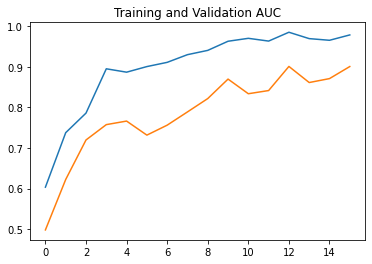

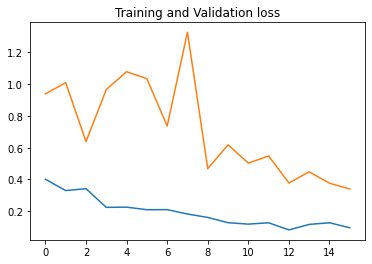

In [37]:
RMS_utils.show_results(history, save = False)

In [70]:
RMS_utils.show_preds(model, validation_generator)

Confusion Matrix
[[23 10]
 [16 98]]
              precision    recall  f1-score   support

        ARMS       0.59      0.70      0.64        33
        ERMS       0.91      0.86      0.88       114

    accuracy                           0.82       147
   macro avg       0.75      0.78      0.76       147
weighted avg       0.84      0.82      0.83       147



In [39]:
#Save Model to use in visualisations and get auc
import pickle

model.save('Saved Model - myogenin')
with open('Saved Model History - myogenin', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Saved Model - myogenin\assets
